In [1]:
import pandas as pd
# pd.set_option('display.max_colwidth')
pd.set_option('display.width',20)

doc_t=pd.read_csv("amazon_baby.csv")
doc_t.head(4)


,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5


In [2]:
import pandas as pd
doc=pd.read_csv("used4.5.csv")
doc.head(4)

,Unnamed: 0,name,review,index,Category
0,0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",0,Baby_Care
1,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1,Diapering
2,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,2,Nursery
3,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,3,Baby_Care


In [3]:
data_text=doc[["review","Category"]]
# data_text['index']=data_text.index

documents=data_text

In [4]:
documents.head(4)

,review,Category
0,"These flannel wipes are OK, but in my opinion ...",Baby_Care
1,it came early and was not disappointed. i love...,Diapering
2,Very soft and comfortable and warmer than it l...,Nursery
3,This is a product well worth the purchase. I ...,Baby_Care


In [5]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
doc=pd.read_csv("used4.5.csv")
doc

,Unnamed: 0,name,review,index,Category
0,0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",0,Baby_Care
1,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,1,Diapering
2,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,2,Nursery
3,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,3,Baby_Care
4,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,4,Baby_Care
...,...,...,...,...,...
408,654,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,The sweaters are very nice and fit quite well....,654,Apparel_accessories
409,658,U·nikaka Unisex Baby 0-48 Months 5-Pack Pants ...,My 13 month old is short and round lol. So I’m...,658,Apparel_accessories
410,660,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,This is sp cute and hilarious 100 recomend goo...,660,Apparel_accessories
411,661,HAICHEN TEC Ferret Clothes Turtleneck Sweater ...,Mr. B is only 4 weeks old and looks so handsom...,661,Apparel_accessories


In [6]:
data_text=doc[["review","Category"]]
data_text['index']=data_text.index

documents=data_text

<ipython-input-6-318acfee2307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_text['index']=data_text.index


In [7]:
documents

,review,Category,index
0,"These flannel wipes are OK, but in my opinion ...",Baby_Care,0
1,it came early and was not disappointed. i love...,Diapering,1
2,Very soft and comfortable and warmer than it l...,Nursery,2
3,This is a product well worth the purchase. I ...,Baby_Care,3
4,All of my kids have cried non-stop when I trie...,Baby_Care,4
...,...,...,...
408,The sweaters are very nice and fit quite well....,Apparel_accessories,408
409,My 13 month old is short and round lol. So I’m...,Apparel_accessories,409
410,This is sp cute and hilarious 100 recomend goo...,Apparel_accessories,410
411,Mr. B is only 4 weeks old and looks so handsom...,Apparel_accessories,411


In [8]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
import nltk.stem as stemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /Users/deth/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
stemmer=PorterStemmer()
def lemmatize_stemming(text):
      return stemmer.stem(WordNetLemmatizer().lemmatize(text,pos='v'))

def preprocess(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) >3:
              result.append(lemmatize_stemming(token))
  
    return result

In [10]:
doc_sample=documents[documents['index']==4].values[0][0]
print('original document')
words=[]
for word in doc_sample.split(' '):
      words.append(word)
print(words)
print('\n\n tokenized and lemmatized document: ')
print(preprocess(doc_sample))

original document
['All', 'of', 'my', 'kids', 'have', 'cried', 'non-stop', 'when', 'I', 'tried', 'to', 'ween', 'them', 'off', 'their', 'pacifier,', 'until', 'I', 'found', 'Thumbuddy', 'To', "Love's", 'Binky', 'Fairy', 'Puppet.', '', 'It', 'is', 'an', 'easy', 'way', 'to', 'work', 'with', 'your', 'kids', 'to', 'allow', 'them', 'to', 'understand', 'where', 'their', 'pacifier', 'is', 'going', 'and', 'help', 'them', 'part', 'from', 'it.This', 'is', 'a', 'must', 'buy', 'book,', 'and', 'a', 'great', 'gift', 'for', 'expecting', 'parents!!', '', 'You', 'will', 'save', 'them', 'soo', 'many', 'headaches.Thanks', 'for', 'this', 'book!', '', 'You', 'all', 'rock!!']


 tokenized and lemmatized document: 
['kid', 'cri', 'stop', 'tri', 'ween', 'pacifi', 'thumbuddi', 'love', 'binki', 'fairi', 'puppet', 'easi', 'work', 'kid', 'allow', 'understand', 'pacifi', 'go', 'help', 'book', 'great', 'gift', 'expect', 'parent', 'save', 'headach', 'thank', 'book', 'rock']


In [11]:
documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


<ipython-input-11-00cd468fc166>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  documents.dropna(subset = ["review"], inplace=True) # drop those rows which have NaN value cells


In [12]:
processed_docs = documents['review'].map(preprocess)
processed_docs

0      [flannel, wipe, opinion, worth, keep, order, s...
1      [come, earli, disappoint, love, planet, wise, ...
2      [soft, comfort, warmer, look, size, perfectli,...
3      [product, worth, purchas, like, posit, ingeni,...
4      [kid, cri, stop, tri, ween, pacifi, thumbuddi,...
                             ...                        
408    [sweater, nice, ferret, mind, fabric, great, p...
409    [month, short, round, find, difficult, pant, p...
410    [cute, hilari, recomend, good, ador, halloween...
411    [week, look, handsom, littl, sweater, hard, sw...
412    [want, dress, guinea, sweater, small, especi, ...
Name: review, Length: 413, dtype: object

In [13]:
dictionary=gensim.corpora.Dictionary(processed_docs)
count=0

for k,v in dictionary.iteritems():
    print(k,v)
    count+=1
    if count>10:
        break

0 blue
1 boyfor
2 cloth
3 countwhich
4 face
5 flannel
6 hand
7 handl
8 higher
9 issu
10 keep


In [14]:
dictionary.filter_extremes(no_below=15,no_above=0.5)


In [15]:
bow_corpus=[dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[4]


[(13, 1),
 (24, 2),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 2),
 (32, 1),
 (33, 1),
 (34, 1)]

In [16]:
bow_doc_4=bow_corpus[4]
for i in range(len(bow_doc_4)):
    print("Word {} (\"{}\") appears {} time.".format(bow_doc_4[i][0], 
                                               dictionary[bow_doc_4[i][0]], 
bow_doc_4[i][1]))

Word 13 ("love") appears 1 time.
Word 24 ("book") appears 2 time.
Word 25 ("easi") appears 1 time.
Word 26 ("expect") appears 1 time.
Word 27 ("gift") appears 1 time.
Word 28 ("go") appears 1 time.
Word 29 ("great") appears 1 time.
Word 30 ("help") appears 1 time.
Word 31 ("kid") appears 2 time.
Word 32 ("parent") appears 1 time.
Word 33 ("tri") appears 1 time.
Word 34 ("work") appears 1 time.


In [17]:
from gensim import corpora, models
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
  pprint(doc)
  break

[(0, 0.37378287425890977),
 (1, 0.2910888830907095),
 (2, 0.32540999039054613),
 (3, 0.1454802833186967),
 (4, 0.2846385440521788),
 (5, 0.36733253522037906),
 (6, 0.36121313179202574),
 (7, 0.31688477799387366),
 (8, 0.28153961109325704),
 (9, 0.3498424166134522)]


In [18]:
lda_model_tfidf=gensim.models.LdaMulticore(corpus_tfidf,num_topics=8,id2word=dictionary,passes=2,workers=4)
# lda_model_tfidf = LatentDirichletAllocation(n_components=10,               # Number of topics
#                                       max_iter=10,               # Max learning iterations
#                                       learning_method='online',   
#                                       random_state=100,          # Random state
#                                       batch_size=128,            # n docs in each learning iter
#                                       evaluate_every = -1,       # compute perplexity every n iters, default: Don't
#                                       n_jobs = -1,               # Use all available CPUs
                                     
for idx, topic in lda_model_tfidf.print_topics(-1):
      print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high" + 0.022*"learn" + 0.022*"great" + 0.021*"buy" + 0.019*"item" + 0.017*"time"
Topic: 1 Word: 0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera" + 0.021*"great" + 0.019*"play" + 0.016*"like" + 0.016*"give" + 0.016*"month"
Topic: 2 Word: 0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi" + 0.021*"diaper" + 0.020*"page" + 0.020*"happi" + 0.019*"love" + 0.017*"track"
Topic: 3 Word: 0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look" + 0.019*"item" + 0.019*"go" + 0.018*"like" + 0.018*"babi" + 0.018*"month"
Topic: 4 Word: 0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint" + 0.019*"room" + 0.019*"nice" + 0.019*"good" + 0.019*"year" + 0.018*"littl"
Topic: 5 Word: 0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili" + 0.027*"cute" + 0.026*"teeth" + 0.023*"interact" + 0.021*"vibrat" 

In [19]:
lda_model_bow=gensim.models.LdaMulticore(bow_corpus,num_topics=8,id2word=dictionary,passes=2,workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
      print('Topic: {} Word: {}'.format(idx,topic))

Topic: 0 Word: 0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high" + 0.022*"learn" + 0.022*"great" + 0.021*"buy" + 0.019*"item" + 0.017*"time"
Topic: 1 Word: 0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera" + 0.021*"great" + 0.019*"play" + 0.016*"like" + 0.016*"give" + 0.016*"month"
Topic: 2 Word: 0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi" + 0.021*"diaper" + 0.020*"page" + 0.020*"happi" + 0.019*"love" + 0.017*"track"
Topic: 3 Word: 0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look" + 0.019*"item" + 0.019*"go" + 0.018*"like" + 0.018*"babi" + 0.018*"month"
Topic: 4 Word: 0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint" + 0.019*"room" + 0.019*"nice" + 0.019*"good" + 0.019*"year" + 0.018*"littl"
Topic: 5 Word: 0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili" + 0.027*"cute" + 0.026*"teeth" + 0.023*"interact" + 0.021*"vibrat" 

In [20]:
for index, score in sorted(lda_model_tfidf[bow_corpus[4]],key=lambda tup:-1*tup[1]):
  print("\nScore:{}\t \nTopic:{}".format(score,lda_model_tfidf.print_topic(index,10)))


Score:0.941565990447998	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter" + 0.021*"babi" + 0.021*"year" + 0.020*"start" + 0.019*"receiv" + 0.019*"love"


In [21]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model_tfidf, bow_corpus, dictionary)
vis

PreparedData(topic_coordinates=              x  \
topic             
1     -0.062592   
6      0.034101   
2      0.044793   
4     -0.032209   
3     -0.030716   
0      0.034196   
7     -0.049953   
5      0.062379   

              y  \
topic             
1      0.054635   
6     -0.015346   
2      0.015587   
4      0.006622   
3      0.033206   
0      0.012890   
7     -0.095689   
5     -0.011905   

       topics  \
topic           
1           1   
6           2   
2           3   
4           4   
3           5   
0           6   
7           7   
5           8   

       cluster  \
topic            
1            1   
6            1   
2            1   
4            1   
3            1   
0            1   
7            1   
5            1   

            Freq  
topic             
1      22.715133  
6      22.139139  
2      12.706649  
4      10.183207  
3       9.397014  
0       8.724766  
7       7.196389  
5       6.937703  , topic_info=        Term  \
24      book   
131  teether   
135    sling   
122     free   
67     stick   
..       ...   
44      babi   
3      month   
56     think   
29     great   
84       buy   

          Freq  \
24   91.000000   
131  37.000000   
135  63.000000   
122  26.000000   
67   37.000000   
..         ...   
44    7.465263   
3     6.012056   
56    5.061366   
29    5.352865   
84    4.969104   

          Total  \
24    91.000000   
131   37.000000   
135   63.000000   
122   26.000000   
67    37.000000   
..          ...   
44   122.127852   
3     89.082530   
56    68.343420   
29    89.986725   
84    72.054133   

    Category  \
24   Default   
131  Default   
135  Default   
122  Default   
67   Default   
..       ...   
44    Topic8   
3     Topic8   
56    Topic8   
29    Topic8   
84    Topic8   

     logprob  \
24   30.0000   
131  29.0000   
135  28.0000   
122  27.0000   
67   26.0000   
..       ...   
44   -3.9494   
3    -4.1659   
56   -4.3380   
29   -4.2820   
84   -4.3564   

     loglift  
24   30.0000  
131  29.0000  
135  28.0000  
122  27.0000  
67   26.0000  
..       ...  
44   -0.1266  
3    -0.0276  
56    0.0653  
29   -0.1538  
84   -0.0060  

[351 rows x 6 columns], token_table=      Topic  \
term          
41        1   
41        2   
41        3   
41        4   
41        5   
...     ...   
89        4   
89        5   
89        6   
89        7   
89        8   

          Freq  \
term             
41    0.345991   
41    0.239532   
41    0.053229   
41    0.106459   
41    0.026615   
...        ...   
89    0.147864   
89    0.040327   
89    0.040327   
89    0.013442   
89    0.080653   

      Term  
term        
41     abl  
41     abl  
41     abl  
41     abl  
41     abl  
...    ...  
89    year  
89    year  
89    year  
89    year  
89    year  

[1004 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 7, 3, 5, 4, 1, 8, 6])

In [22]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_tfidf[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\n".format(score,lda_model_tfidf.print_topic(index,5)))


Score:0.562297523021698	 
Topic:0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look"


Score:0.06257722526788712	 
Topic:0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high"


Score:0.06253772228956223	 
Topic:0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi"


Score:0.06253436952829361	 
Topic:0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili"


Score:0.06253432482481003	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter"


Score:0.0625104233622551	 
Topic:0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera"


Score:0.06250792741775513	 
Topic:0.049*"teether" + 0.033*"stick" + 0.031*"free" + 0.026*"vibrat" + 0.025*"buy"


Score:0.0625004842877388	 
Topic:0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint"



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
for index, score in sorted(lda_model_bow[bow_corpus[4]],key=lambda tup:-1*tup[1]):
  print("\nScore:{}\t \nTopic:{}".format(score,lda_model_tfidf.print_topic(index,10)))


Score:0.941581130027771	 
Topic:0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high" + 0.022*"learn" + 0.022*"great" + 0.021*"buy" + 0.019*"item" + 0.017*"time"


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [24]:
unseen_document = 'This wallpaper has always been one of my favorite  '
bow_vector = dictionary.doc2bow(preprocess(unseen_document))
for index, score in sorted(lda_model_bow[bow_vector], key=lambda tup: -1*tup[1]):
    
        print("\nScore:{}\t \nTopic:{}\n".format(score,lda_model_tfidf.print_topic(index,5)))


Score:0.5622735619544983	 
Topic:0.025*"love" + 0.024*"book" + 0.023*"month" + 0.022*"babi" + 0.022*"high"


Score:0.06263228505849838	 
Topic:0.034*"book" + 0.030*"price" + 0.028*"good" + 0.028*"qualiti" + 0.027*"famili"


Score:0.06253305077552795	 
Topic:0.049*"teether" + 0.033*"stick" + 0.031*"free" + 0.026*"vibrat" + 0.025*"buy"


Score:0.06252403557300568	 
Topic:0.039*"play" + 0.025*"great" + 0.022*"easi" + 0.021*"favorit" + 0.020*"look"


Score:0.06252161413431168	 
Topic:0.042*"sling" + 0.032*"gift" + 0.027*"babi" + 0.027*"monitor" + 0.025*"camera"


Score:0.06250891834497452	 
Topic:0.031*"love" + 0.023*"easi" + 0.022*"babi" + 0.022*"need" + 0.020*"disappoint"


Score:0.06250590085983276	 
Topic:0.027*"perfect" + 0.027*"diaper" + 0.025*"book" + 0.023*"think" + 0.022*"daughter"


Score:0.06250068545341492	 
Topic:0.039*"book" + 0.029*"year" + 0.025*"like" + 0.021*"look" + 0.021*"babi"



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [25]:
def format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs):
    sent_topics_df=pd.DataFrame()
    
    for i, row_list in enumerate(lda_model[corpus]):
        row=row_list[0] if lda_model.per_word_topics else row_list
        row=sorted(row,key=lambda x:(x[1]),reverse=True)
        
        for j, (topic_num,prop_topic) in enumerate(row):
            if j==0:
                wp=lda_model.show_topic(topic_num)
                topic_keywords=', '.join([word for word, prop in wp])
                sent_topics_df=sent_topics_df.append(pd.Series([int(topic_num),round(prop_topic,4),topic_keywords]),ignore_index=True)
            else:
                break
    sent_topics_df.columns=['Dominant_topic','Perc_contribution','Topic_keywords']
    contents=pd.Series(texts)
    sent_topics_df=pd.concat([sent_topics_df,contents],axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topic_sentences(lda_model=lda_model_tfidf, corpus=bow_corpus, texts=processed_docs)

# Format.  
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic['index']=df_dominant_topic.index
df_dominant_topic

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4
...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411


In [26]:
new_df_1 = pd.merge(df_dominant_topic, documents[['Category','index','review']], on='index')

new_df_1

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text,index,Category,review
0,0,4.0,0.9203,"love, easi, babi, need, disappoint, room, nice...","[flannel, wipe, opinion, worth, keep, order, s...",0,Baby_Care,"These flannel wipes are OK, but in my opinion ..."
1,1,4.0,0.8540,"love, easi, babi, need, disappoint, room, nice...","[come, earli, disappoint, love, planet, wise, ...",1,Diapering,it came early and was not disappointed. i love...
2,2,6.0,0.8540,"perfect, diaper, book, think, daughter, babi, ...","[soft, comfort, warmer, look, size, perfectli,...",2,Nursery,Very soft and comfortable and warmer than it l...
3,3,6.0,0.9270,"perfect, diaper, book, think, daughter, babi, ...","[product, worth, purchas, like, posit, ingeni,...",3,Baby_Care,This is a product well worth the purchase. I ...
4,4,6.0,0.9416,"perfect, diaper, book, think, daughter, babi, ...","[kid, cri, stop, tri, ween, pacifi, thumbuddi,...",4,Baby_Care,All of my kids have cried non-stop when I trie...
...,...,...,...,...,...,...,...,...
408,408,1.0,0.9026,"sling, gift, babi, monitor, camera, great, pla...","[sweater, nice, ferret, mind, fabric, great, p...",408,Apparel_accessories,The sweaters are very nice and fit quite well....
409,409,6.0,0.9203,"perfect, diaper, book, think, daughter, babi, ...","[month, short, round, find, difficult, pant, p...",409,Apparel_accessories,My 13 month old is short and round lol. So I’m...
410,410,5.0,0.8247,"book, price, good, qualiti, famili, cute, teet...","[cute, hilari, recomend, good, ador, halloween...",410,Apparel_accessories,This is sp cute and hilarious 100 recomend goo...
411,411,6.0,0.9027,"perfect, diaper, book, think, daughter, babi, ...","[week, look, handsom, littl, sweater, hard, sw...",411,Apparel_accessories,Mr. B is only 4 weeks old and looks so handsom...


In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
count_vec=CountVectorizer()
bow=count_vec.fit_transform(new_df_1['Keywords'].astype(str))
bow=np.array(bow.todense())
bow1=count_vec.fit_transform(new_df_1['Text'].astype(str))
bow1=np.array(bow1.todense())
bow2=np.concatenate((bow,bow1),axis=1)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [28]:
x=bow2
y=new_df_1['Category']

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from sklearn.preprocessing import StandardScaler


from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [30]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1,stratify=y,random_state=123)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [31]:
sc=StandardScaler()

scaler = sc.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [32]:
# # # SMOTE only use with training data. 
# # from imblearn.combine import SMOTETomek
# # from imblearn.combine import SMOTEENN


# # from imblearn.over_sampling import ADASYN

# from imblearn.over_sampling import SMOTE
# # from imblearn.under_sampling import RandomUnderSampler

# # import imblearn

# smt = SMOTE("minority")
# # # smt = ADASYN(random_state=130)
# # # ada = SMOTETomek(random_state=139)
# # # ada = SMOTEENN()
# X_SMOTE, y_SMOTE = smt.fit_resample(X_train, y_train)
# # # smt = RandomUnderSampler(random_state=42)
# # # smt=SMOTE()
# # # X_SMOTE,y_SMOTE = smt.fit_resample(trainX_scaled, y_train)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [33]:
# from imblearn.under_sampling import NearMiss
# smt = NearMiss()
# # smt = RandomUnderSampler(random_state=42)
# # smt=SMOTE()
# X_SMOTE,y_SMOTE = smt.fit_resample(X_train, y_train)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
# X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
from sklearn import svm
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
import time
start = time.time()



# Best 2
model2 = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [250, 2.5, 2.5, 0.25, 0.25]
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=5, random_state=1)
model = GridSearchCV(estimator=model2, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

# param_grid = {'C': [0.2, 2, 20, 200, 2000],
#               'gamma': [2, 0.2, 0.02, 0.002, 0.0002],
#               'kernel': ['rbf']}
 
# model = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
# model = grid_search.fit(X, y)
# model=XGBClassifier(
# learning_rate =0.05,
#  n_estimators=1000,
#  max_depth=10,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.9,
#  colsample_bytree=0.9,
#  objective= 'multi:softmax',
#  nthread=10,
#  scale_pos_weight=1
# )

# from sklearn.neighbors import KNeighborsClassifier
# model = KNeighborsClassifier()
# model.fit(X_SMOTE,y_SMOTE)

# model=svm.SVC(kernel='linear', C=1, random_state=0)

# from sklearn.ensemble import RandomForestClassifier
# model = RandomForestClassifier()
# model.fit(X_SMOTE,y_SMOTE)

# Best 1
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=1000)#0.78
# mlp = MLPClassifier(max_iter=400)
# model = MLPClassifier(max_iter=1000)
# model = MLPClassifier(hidden_layer_sizes=(5,2),
#                       activation = 'relu',
#                       solver = 'adam',
#     max_iter=1000)
# model = MLPClassifier(hidden_layer_sizes=(1250,900,400),
#                         max_iter = 1000,activation = 'relu',
#                         solver = 'adam')
# parameter_space = {
#     'hidden_layer_sizes': [(sp_randint.rvs(100,600,1),sp_randint.rvs(100,600,1),), 
#                                           (sp_randint.rvs(100,600,1),)],
#     'activation': ['tanh', 'relu', 'logistic'],
#     'solver': ['sgd', 'adam', 'lbfgs'],
#     'alpha': uniform(0.0001, 0.9),
#     'learning_rate': ['constant','adaptive']
# }


from sklearn.model_selection import GridSearchCV

# model = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
# mlp=MLPClassifier(hidden_layer_sizes=(150,100,50),
#                         max_iter = 300,activation = 'relu',
#                         solver = 'adam')
# model=MLPClassifier()

# param_grid = {
#     'hidden_layer_sizes': [(150,100,50), (120,80,40), (100,50,30)],
#     'max_iter': [50, 100, 150],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# model = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=5)
# model.fit(trainX_scaled, trainY)
# model.fit(X_SMOTE,y_SMOTE)
# model.fit(X_SMOTE,y_SMOTE)


# best 1
# model = MLPClassifier(hidden_layer_sizes = [100]*5)
# model.fit(X_SMOTE,y_SMOTE)

# from sklearn.multiclass import OneVsRestClassifier
# model = OneVsRestClassifier(MLPClassifier(hidden_layer_sizes = [100]*5))
# # model.fit(X_SMOTE,y_SMOTE)

# from sklearn.svm import SVC
# model = SVC(decision_function_shape='ovr')
# svm_classifier.fit(X_SMOTE,y_SMOTE)
# from sklearn.multiclass import OneVsRestClassifier

# from xgboost import XGBClassifier
# model = OneVsRestClassifier(XGBClassifier())
# xgb_classifier.fit(X_SMOTE,y_SMOTE)


history=model.fit(X_train,y_train)
# history=model.fit(X_SMOTE,y_SMOTE)
history


end = time.time()
print("The time of execution of above program is :", end-start)


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  warnings.warn(
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  warnings.warn(
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 16 members, which is less than n_splits=20.
  warnings.warn(
/Users/det

The time of execution of above program is : 133.4394690990448


In [36]:
y_pred1=model.predict(X_test)
# x1=accuracy_score(y_test,y_pred)
# x1

# y_pred1=model.predict(testX_scaled)
x11=accuracy_score(y_test,y_pred1)
x11

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.7857142857142857

In [37]:
print(classification_report(y_test, y_pred1))


                        precision    recall  f1-score   support

Activity_entertainment       0.75      0.75      0.75         4
   Apparel_accessories       1.00      1.00      1.00         2
             Baby_Care       1.00      0.75      0.86         8
       Baby_stationary       0.62      0.83      0.71         6
     Baby_toddler_toys       0.67      0.75      0.71         8
             Diapering       1.00      1.00      1.00         3
                  Gift       1.00      0.60      0.75         5
               Nursery       0.71      0.83      0.77         6

              accuracy                           0.79        42
             macro avg       0.84      0.81      0.82        42
          weighted avg       0.82      0.79      0.79        42



/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
results = pd.DataFrame(data={'predicted': y_pred1, 'actual': y_test})
results['result'] = np.where(results['predicted']==results['actual'], 1, 0)
results.sort_values(by='result').head(20)

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,predicted,actual,result
212,Nursery,Baby_Care,0
216,Baby_stationary,Baby_toddler_toys,0
326,Baby_stationary,Gift,0
277,Activity_entertainment,Baby_Care,0
197,Nursery,Baby_toddler_toys,0
92,Baby_toddler_toys,Nursery,0
29,Baby_stationary,Activity_entertainment,0
191,Baby_toddler_toys,Gift,0
231,Baby_toddler_toys,Baby_stationary,0
345,Nursery,Nursery,1


/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(module.__version__) < minver:
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/deth/opt/anaconda3/lib/python3.8/site-packages/matplotlib/__init__.py:169: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(

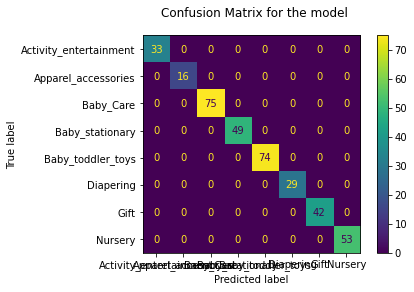

In [39]:
import matplotlib.pyplot as plt
fig = plot_confusion_matrix(model, X_train, y_train, display_labels=model.classes_)
fig.figure_.suptitle("Confusion Matrix for the model")
plt.show()

In [40]:
plt.plot(model.loss_curve_)
# plt.plot(model.coef_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

/Users/deth/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


AttributeError: 'GridSearchCV' object has no attribute 'loss_curve_'

In [ ]:
# import matplotlib.pyplot as plt
# # print(model.history.keys())
# # summarize history for accuracy
# plt.plot(history.history[ 'accuracy' ])
# plt.plot(history.history[ 'val_accuracy' ])
# plt.title( 'model accuracy' )
# plt.ylabel( 'accuracy' )
# plt.xlabel( 'epoch' )
# plt.legend([ 'train' , 'test' ], loc= 'lower right' )
# plt.show()

# import matplotlib.pyplot as plt
# # print(model.history.keys())
# # summarize history for accuracy
# plt.plot(history.history[ 'loss' ])
# plt.plot(history.history[ 'val_loss' ])
# plt.title( 'model loss' )
# plt.ylabel( 'loss' )
# plt.xlabel( 'epoch' )
# plt.legend([ 'train' , 'test' ], loc= 'upper left' )
# plt.show()

In [ ]:
# scores_train = []
# scores_test = []

# scores_train.append(model.score(X_SMOTE,y_SMOTE))
# scores_test.append(model.score(X_test,y_test))


In [ ]:
# scores_test

In [ ]:
# scores_train